In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ddos_file.csv")

In [6]:
df.head(10)

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,fe80::3446:14ff:fe5a:86a7,2409:4050:2eb4:bea0:98f3:169d:57fa:365f,ICMPv6,86,Neighbor Solicitation for 2409:4050:2eb4:bea0:...
1,2,0.000000,2409:4050:2eb4:bea0:98f3:169d:57fa:365f,fe80::3446:14ff:fe5a:86a7,ICMPv6,86,Neighbor Advertisement 2409:4050:2eb4:bea0:98f...
2,3,2.389470,192.168.186.38,208.115.231.82,TCP,60,52002 > 443 [ACK] Seq=1 Ack=1 Win=255 Len=1
3,4,2.492254,208.115.231.82,192.168.186.38,TCP,60,443 > 52002 [ACK] Seq=0 Ack=2 Win=501 Len=0
4,5,2.492254,192.168.186.38,208.115.231.82,TCP,60,[TCP Dup ACK 3#1] [TCP ACKed unseen segment] 5...
5,6,2.567292,208.115.231.82,192.168.186.38,TCP,66,[TCP Previous segment not captured] 443 > 52...
6,7,2.792780,2409:4050:2eb4:bea0:98f3:169d:57fa:365f,2606:4700:90c8:b66d:fd64:66:48da:2f3b,TCP,75,53288 > 443 [ACK] Seq=1 Ack=1 Win=256 Len=1
7,8,2.827915,2606:4700:90c8:b66d:fd64:66:48da:2f3b,2409:4050:2eb4:bea0:98f3:169d:57fa:365f,TCP,86,443 > 53288 [ACK] Seq=1 Ack=2 Win=12 Len=0 S...
8,9,3.184860,2409:4050:2eb4:bea0:98f3:169d:57fa:365f,2603:1063:10:101::365:7ea3,TCP,86,53560 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...
9,10,3.254169,2603:1063:10:101::365:7ea3,2409:4050:2eb4:bea0:98f3:169d:57fa:365f,TCP,86,"443 > 53560 [SYN, ACK] Seq=0 Ack=1 Win=65535..."


In [7]:
df.isnull().sum()

No.            0
Time           0
Source         0
Destination    0
Protocol       0
Length         0
Info           0
dtype: int64

In [9]:
df.describe()

,No.,Time,Length
count,158020.000000,158020.000000,158020.000000
mean,79010.500000,86.334793,58.681768
std,45616.589106,22.345514,59.585729
min,1.000000,0.000000,42.000000
25%,39505.750000,70.060127,54.000000
50%,79010.500000,72.726770,60.000000
75%,118515.250000,101.825096,60.000000
max,158020.000000,158.141080,6420.000000


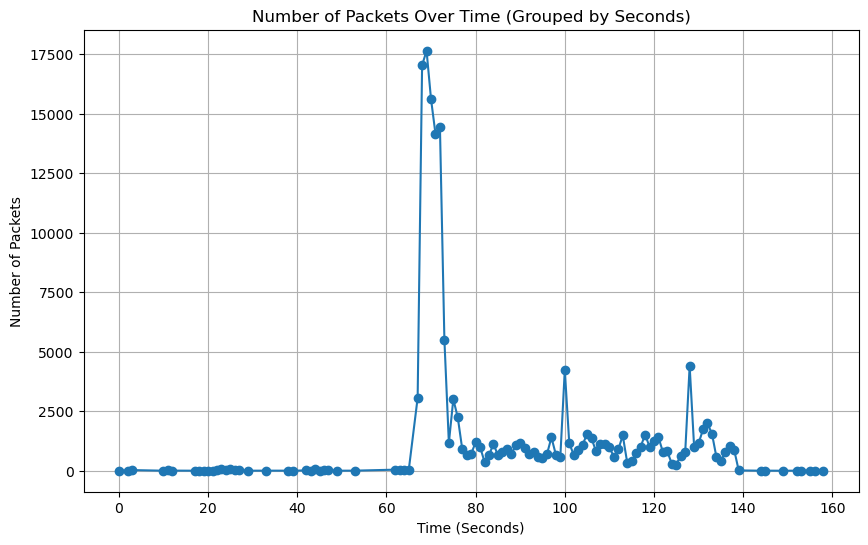

In [13]:
df['Time_sec'] = df['Time'].apply(lambda x: int(x))

# Group by the new 'Time_sec' column and count the number of packets per second
packet_counts = df.groupby('Time_sec').size()

# Plot the number of packets over time
plt.figure(figsize=(10, 6))
plt.plot(packet_counts.index, packet_counts.values, marker='o', linestyle='-')
plt.title('Number of Packets Over Time (Grouped by Seconds)')
plt.xlabel('Time (Seconds)')
plt.ylabel('Number of Packets')
plt.grid(True)
plt.show()


In [14]:
df

,No.,Time,Source,Destination,Protocol,Length,Info,Time_sec
0,1,0.000000,fe80::3446:14ff:fe5a:86a7,2409:4050:2eb4:bea0:98f3:169d:57fa:365f,ICMPv6,86,Neighbor Solicitation for 2409:4050:2eb4:bea0:...,0
1,2,0.000000,2409:4050:2eb4:bea0:98f3:169d:57fa:365f,fe80::3446:14ff:fe5a:86a7,ICMPv6,86,Neighbor Advertisement 2409:4050:2eb4:bea0:98f...,0
2,3,2.389470,192.168.186.38,208.115.231.82,TCP,60,52002 > 443 [ACK] Seq=1 Ack=1 Win=255 Len=1,2
3,4,2.492254,208.115.231.82,192.168.186.38,TCP,60,443 > 52002 [ACK] Seq=0 Ack=2 Win=501 Len=0,2
4,5,2.492254,192.168.186.38,208.115.231.82,TCP,60,[TCP Dup ACK 3#1] [TCP ACKed unseen segment] 5...,2
...,...,...,...,...,...,...,...,...
158015,158016,155.959253,2409:4050:2eb4:bea0:98f3:169d:57fa:365f,2603:1030:7:5::ab,TCP,75,[TCP Keep-Alive] 53572 > 443 [ACK] Seq=3209 ...,155
158016,158017,156.235709,2603:1030:7:5::ab,2409:4050:2eb4:bea0:98f3:169d:57fa:365f,TCP,86,[TCP Keep-Alive ACK] 443 > 53572 [ACK] Seq=7...,156
158017,158018,158.141080,192.168.186.38,192.168.186.86,DNS,84,Standard query 0xa8b5 AAAA afdxtest.z01.azuref...,158
158018,158019,158.141080,192.168.186.38,192.168.186.86,DNS,84,Standard query 0x6f76 A afdxtest.z01.azurefd.net,158


In [30]:
# Convert the 'Time' column to represent only integer seconds
df['Time_sec'] = df['Time'].apply(lambda x: int(x))

# Group by the new 'Time_sec' column and count the number of packets per second
packet_counts = df.groupby('Time_sec').size()

# Mark seconds as normal (1) or anomalous (0) based on the condition
packet_status = packet_counts.apply(lambda x: 0 if x > 2000 else 1)

# Map the status back to the original dataframe based on the 'Time_sec'
df['Status'] = df['Time_sec'].map(packet_status)

# Display the dataframe with the new 'Status' column


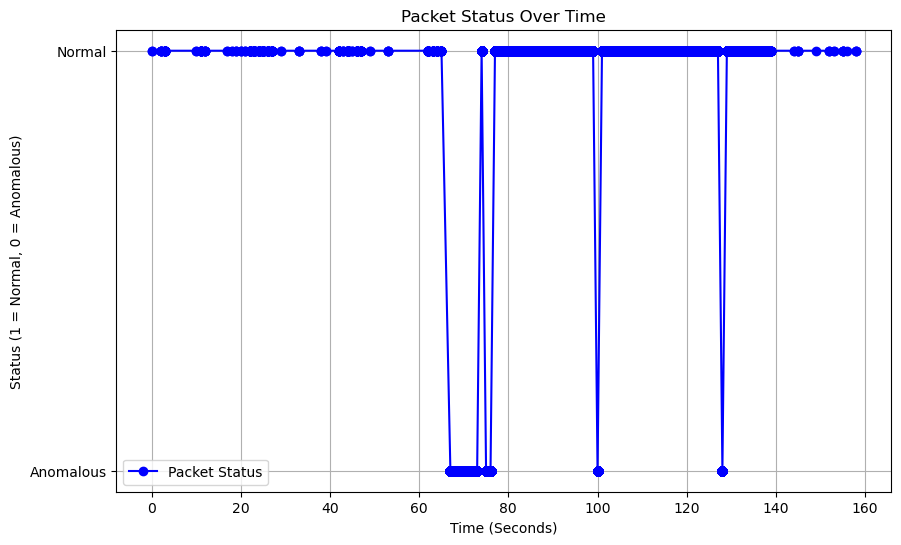

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(df['Time_sec'], df['Status'], marker='o', linestyle='-', color='b', label='Packet Status')

plt.title('Packet Status Over Time')
plt.xlabel('Time (Seconds)')
plt.ylabel('Status (1 = Normal, 0 = Anomalous)')
plt.yticks([0, 1], ['Anomalous', 'Normal'])
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


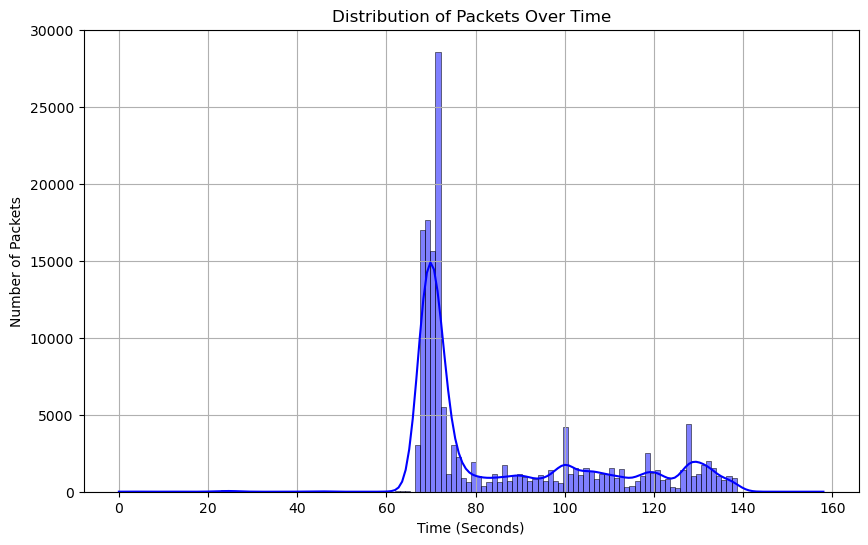

In [33]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Time_sec'], kde=True, color='blue')
plt.title('Distribution of Packets Over Time')
plt.xlabel('Time (Seconds)')
plt.ylabel('Number of Packets')
plt.grid(True)
plt.show()

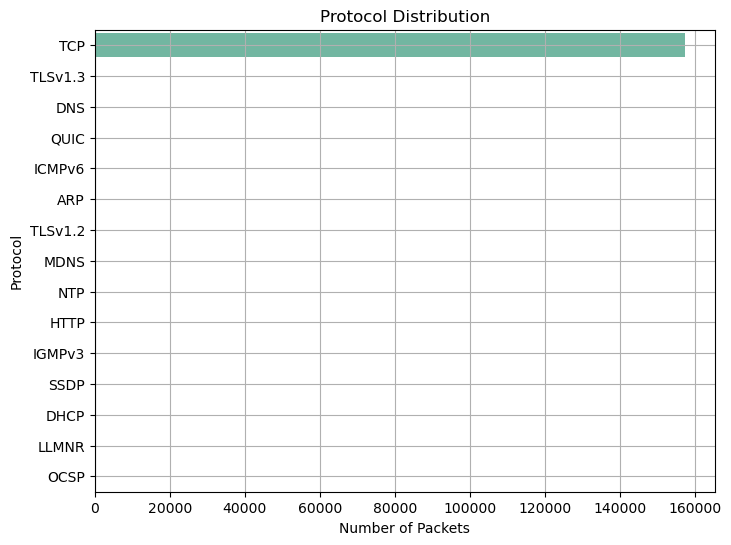

In [34]:
# Plot the distribution of protocols
plt.figure(figsize=(8, 6))
sns.countplot(y='Protocol', data=df, order=df['Protocol'].value_counts().index, palette='Set2')
plt.title('Protocol Distribution')
plt.xlabel('Number of Packets')
plt.ylabel('Protocol')
plt.grid(True)
plt.show()


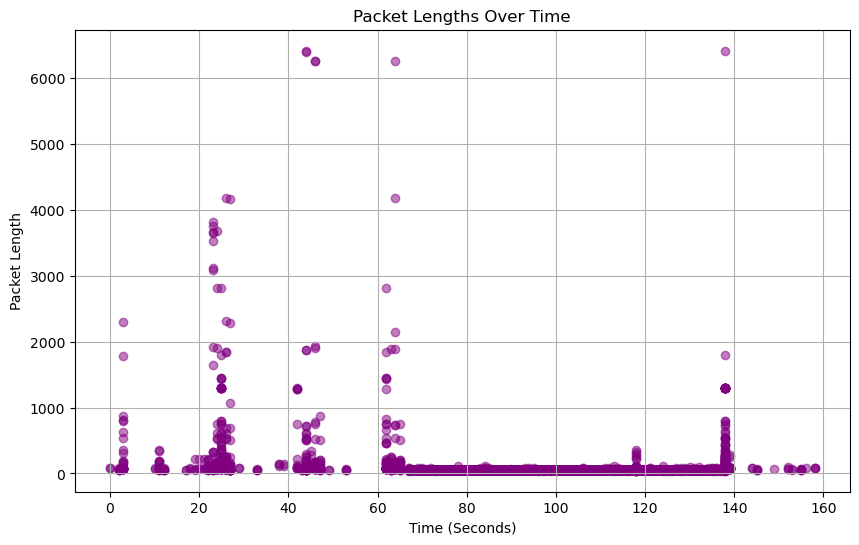

In [37]:
# Scatter plot for time vs packet length
plt.figure(figsize=(10, 6))
plt.scatter(df['Time_sec'], df['Length'], alpha=0.5, color='purple')
plt.title('Packet Lengths Over Time')
plt.xlabel('Time (Seconds)')
plt.ylabel('Packet Length')
plt.grid(True)
plt.show()


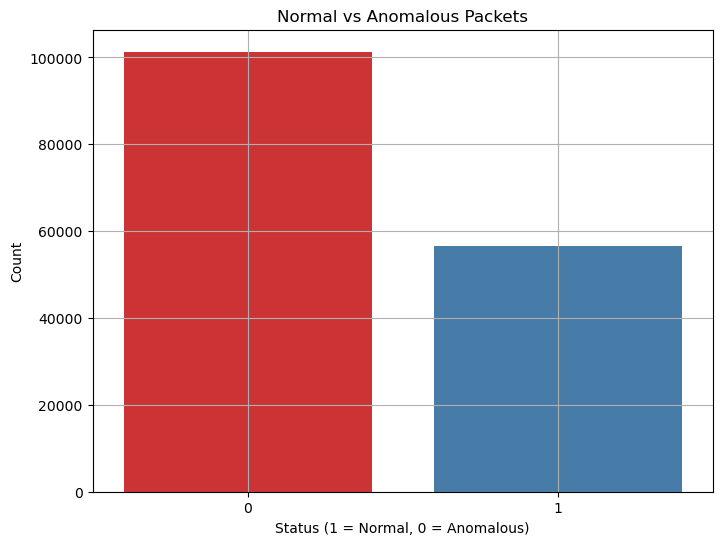

In [38]:
# Plot the distribution of status (Normal vs Anomalous)
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=df, palette='Set1')
plt.title('Normal vs Anomalous Packets')
plt.xlabel('Status (1 = Normal, 0 = Anomalous)')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [39]:
# Count the number of normal and anomalous packets
normal_count = df['Status'].value_counts()[1]  # Normal packets
anomalous_count = df['Status'].value_counts()[0]  # Anomalous packets

print(f"Normal Packets: {normal_count}")
print(f"Anomalous Packets: {anomalous_count}")


Normal Packets: 56698
Anomalous Packets: 101322


In [40]:
df.to_csv('packets_with_status.csv', index=False)